# (Dataset Exploration Title)
## by Jennifer Powell

## Preliminary Wrangling

> I've downloaded 3 years of Air traffic data that contains scheduled and actual departure and arrival times reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). Since the current year only contains data through June, I've only included  Jan-June for 2018, 2019, 2020. 



####  I used Alteryx to combine the multiple years together.  I also used look up tables for CANCEL_REASON and CARRIER and replaced the codes with the text value 

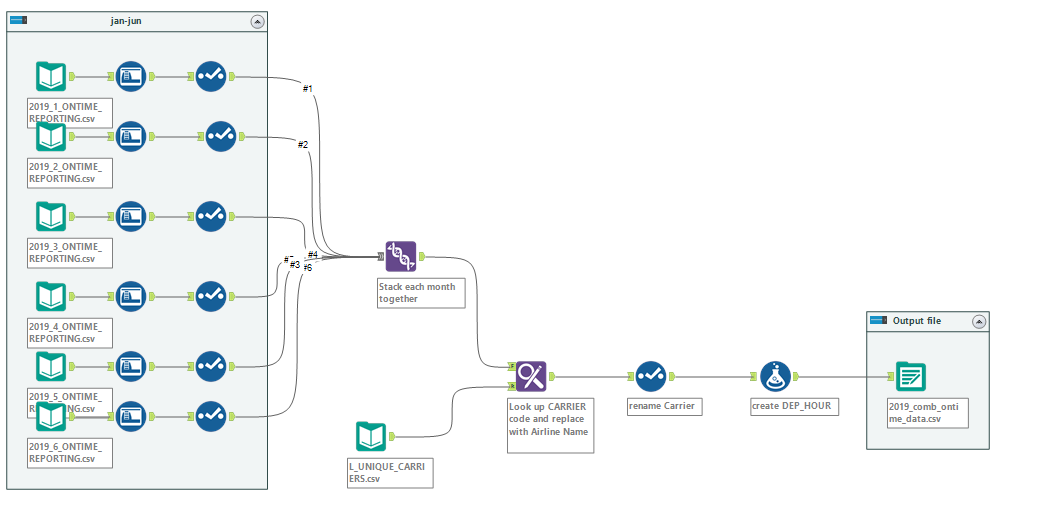

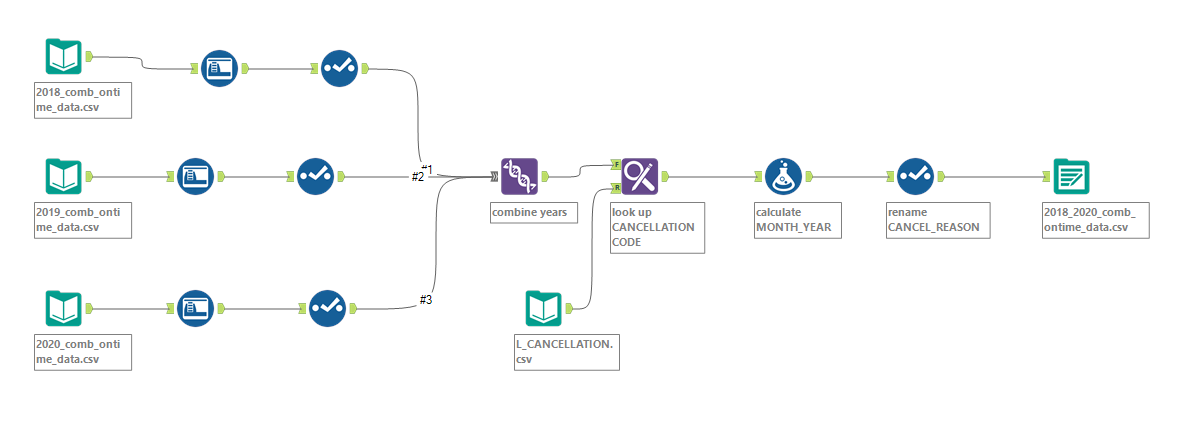

In [464]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in combined ontime dataset.  THe file is large so I had to use low_memory setting to prevent errors

In [2]:
ontime_df = pd.read_csv('2018_2020_6mo_comb_ontime_data.csv',low_memory=False)

In [3]:
ontime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723516 entries, 0 to 9723515
Data columns (total 34 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   QUARTER              int64  
 2   MONTH                int64  
 3   DAY_OF_MONTH         int64  
 4   MONTH_YEAR           object 
 5   CARRIER              object 
 6   ORIGIN               object 
 7   ORIGIN_CITY_NAME     object 
 8   ORIGIN_STATE_ABR     object 
 9   DEST                 object 
 10  DEST_CITY_NAME       object 
 11  DEST_STATE_ABR       object 
 12  CRS_DEP_TIME         int64  
 13  DEP_TIME             float64
 14  DEP_DELAY            float64
 15  DEP_DELAY_NEW        float64
 16  CRS_ARR_TIME         int64  
 17  ARR_TIME             float64
 18  ARR_DELAY            float64
 19  ARR_DELAY_NEW        float64
 20  CANCELLED            int64  
 21  CANCEL_REASON        object 
 22  DIVERTED             int64  
 23  CRS_ELAPSED_TIME     float64
 24

In [76]:
ontime_df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,...,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_HOUR,DELAYED
count,9.723516e+06,9.723516e+06,9.723516e+06,9.723516e+06,9.723516e+06,9.311366e+06,9.307657e+06,9.307657e+06,9.723516e+06,9.302300e+06,...,9.283362e+06,9723516.0,9.723516e+06,1.621635e+06,1.621635e+06,1.621635e+06,1.621635e+06,1.621635e+06,9.723516e+06,9.723516e+06
mean,2.018898e+03,1.456790e+00,3.380243e+00,1.560772e+01,1.329224e+03,1.333392e+03,9.004668e+00,1.251536e+01,1.488840e+03,1.470279e+03,...,1.116199e+02,1.0,7.954716e+02,2.111204e+01,3.873469e+00,1.573738e+01,9.716243e-02,2.575054e+01,1.318081e+03,1.667745e-01
std,7.847173e-01,4.981294e-01,1.694009e+00,8.743124e+00,4.891135e+02,5.015975e+02,4.551287e+01,4.436857e+01,5.167863e+02,5.335947e+02,...,7.055526e+01,0.0,5.862609e+02,6.434575e+01,3.225280e+01,3.651373e+01,3.568060e+00,5.168534e+01,4.899087e+02,3.727745e-01
min,2.018000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.140000e+02,0.000000e+00,1.000000e+00,1.000000e+00,...,4.000000e+00,1.0,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018000e+03,1.000000e+00,2.000000e+00,8.000000e+00,9.150000e+02,9.170000e+02,-6.000000e+00,0.000000e+00,1.104000e+03,1.052000e+03,...,6.000000e+01,1.0,3.660000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+02,0.000000e+00
50%,2.019000e+03,1.000000e+00,3.000000e+00,1.600000e+01,1.321000e+03,1.327000e+03,-3.000000e+00,0.000000e+00,1.517000e+03,1.508000e+03,...,9.300000e+01,1.0,6.370000e+02,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.300000e+03,0.000000e+00
75%,2.020000e+03,2.000000e+00,5.000000e+00,2.300000e+01,1.735000e+03,1.742000e+03,5.000000e+00,5.000000e+00,1.920000e+03,1.916000e+03,...,1.410000e+02,1.0,1.032000e+03,1.800000e+01,0.000000e+00,1.900000e+01,0.000000e+00,3.100000e+01,1.700000e+03,0.000000e+00
max,2.020000e+03,2.000000e+00,6.000000e+00,3.100000e+01,2.359000e+03,2.400000e+03,2.814000e+03,2.814000e+03,2.400000e+03,2.400000e+03,...,1.557000e+03,1.0,5.095000e+03,2.592000e+03,2.475000e+03,1.848000e+03,1.185000e+03,2.454000e+03,2.400000e+03,1.000000e+00


In [5]:
ontime_df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,MONTH_YEAR,CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_HOUR
0,2018,1,1,14,2018-01-01,Endeavor Air Inc.,SYR,"Syracuse, NY",NY,DTW,...,NaN,NaN,1,374,NaN,NaN,NaN,NaN,NaN,500
1,2018,1,1,3,2018-01-01,Endeavor Air Inc.,SYR,"Syracuse, NY",NY,LGA,...,78.0,42.0,1,198,NaN,NaN,NaN,NaN,NaN,1400
2,2018,1,1,6,2018-01-01,Endeavor Air Inc.,SYR,"Syracuse, NY",NY,LGA,...,93.0,45.0,1,198,12.0,0.0,12.0,0.0,0.0,1400
3,2018,1,1,7,2018-01-01,Endeavor Air Inc.,SYR,"Syracuse, NY",NY,LGA,...,68.0,38.0,1,198,NaN,NaN,NaN,NaN,NaN,1400
4,2018,1,1,8,2018-01-01,Endeavor Air Inc.,SYR,"Syracuse, NY",NY,LGA,...,79.0,39.0,1,198,NaN,NaN,NaN,NaN,NaN,1400


####  Set DELAYED flag.  Bureau of Transportation considers a flight delayed if it lands >= 15 minutes past scheduled arrival time

In [7]:
ontime_df['DELAYED'] = np.where((ontime_df.ARR_DELAY_NEW>=15), 1, 0)

####   Determine the top 10 busiest airports determined by # of flights 

In [305]:
top_10_airports = ontime_df.groupby(['ORIGIN_CITY_NAME'])['FLIGHTS'].sum().sort_values(ascending=False).head(10).index
ontime_df.groupby(['ORIGIN_CITY_NAME'])['FLIGHTS'].sum().sort_values(ascending=False).head(10)


ORIGIN_CITY_NAME
Chicago, IL              544999
Atlanta, GA              516121
Dallas/Fort Worth, TX    395566
New York, NY             380289
Denver, CO               326706
Charlotte, NC            319818
Houston, TX              313232
Los Angeles, CA          286417
Washington, DC           267582
Phoenix, AZ              252007
Name: FLIGHTS, dtype: int64

#### Create a subset of the data for the top 10 busiest airports to make the analysis a little less unwieldy

In [659]:
subset_top10_or_df = ontime_df[ontime_df.ORIGIN_CITY_NAME.isin(top_10_airports)]
subset_top10_or_df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,MONTH_YEAR,CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,...,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_HOUR,DELAYED
100,2018,1,1,2,2018-01-01,Endeavor Air Inc.,ATL,"Atlanta, GA",GA,MLB,...,67.0,1,442,0.0,0.0,55.0,0.0,0.0,1200,1
102,2018,1,1,4,2018-01-01,Endeavor Air Inc.,LGA,"New York, NY",NY,ROC,...,NaN,1,254,NaN,NaN,NaN,NaN,NaN,1900,0
103,2018,1,1,5,2018-01-01,Endeavor Air Inc.,LGA,"New York, NY",NY,ROC,...,52.0,1,254,NaN,NaN,NaN,NaN,NaN,1900,0
104,2018,1,1,13,2018-01-01,Endeavor Air Inc.,LGA,"New York, NY",NY,ROC,...,46.0,1,254,NaN,NaN,NaN,NaN,NaN,1600,0
205,2018,1,1,2,2018-01-01,Endeavor Air Inc.,LGA,"New York, NY",NY,MSN,...,123.0,1,812,NaN,NaN,NaN,NaN,NaN,2100,0


####  Calculate  % of ontime flights per year for all flights

YEAR
2018    79.50
2019    77.59
2020    79.54
dtype: float64

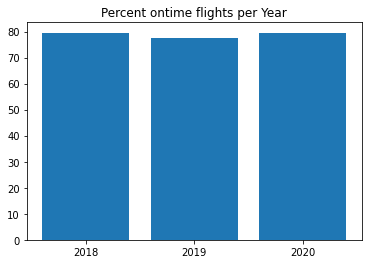

In [672]:
ot = round((ontime_df.groupby(['YEAR'])['FLIGHTS'].sum() - (ontime_df.groupby(['YEAR'])['DIVERTED'].sum() + ontime_df.groupby(['YEAR'])['CANCELLED'].sum() + ontime_df.groupby(['YEAR'])['DELAYED'].sum()))/ontime_df.groupby(['YEAR'])['FLIGHTS'].sum()*100, 2)
plt.bar(ot.index,ot.values)
plt.xticks([2018,2019,2020]);
plt.title('Percent ontime flights per Year');

ot

#### # of Total flights per year

In [661]:
ontime_df.groupby(['YEAR'])['FLIGHTS'].sum()

YEAR
2018    3541604
2019    3634338
2020    2547574
Name: FLIGHTS, dtype: int64

#### Calculate the % of Diverted Flights per year

YEAR
2018    0.24
2019    0.28
2020    0.16
dtype: float64

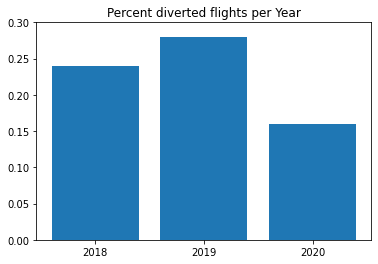

In [662]:
div = round(ontime_df.groupby(['YEAR'])['DIVERTED'].sum()/ontime_df.groupby(['YEAR'])['FLIGHTS'].sum()*100, 2)
plt.bar(div.index,div.values)
plt.xticks([2018,2019,2020]);
plt.title('Percent diverted flights per Year')
plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]);
div

#### Calculate the % of Cancelled Flights per year

YEAR
2018     1.91
2019     2.35
2020    10.39
dtype: float64

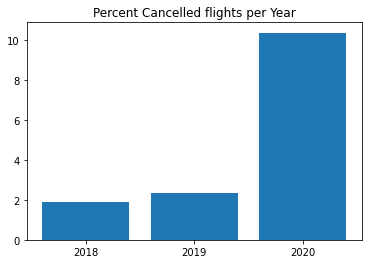

In [663]:
canc = round(ontime_df.groupby(['YEAR'])['CANCELLED'].sum()/ontime_df.groupby(['YEAR'])['FLIGHTS'].sum()*100, 2)
plt.bar(canc.index,canc.values)
plt.xticks([2018,2019,2020]);
plt.title('Percent Cancelled flights per Year')
canc

#### Calculate the % of Delayed Flights per year

YEAR
2018    18.36
2019    19.79
2020     9.91
dtype: float64

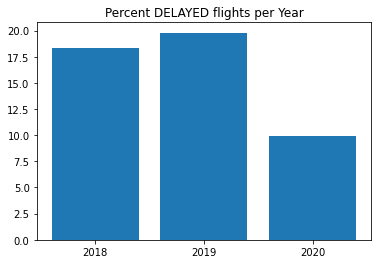

In [664]:
delayed = round(ontime_df.groupby(['YEAR'])['DELAYED'].sum()/ontime_df.groupby(['YEAR'])['FLIGHTS'].sum()*100, 2)
plt.bar(delayed.index,delayed.values)
plt.xticks([2018,2019,2020]);
plt.title('Percent DELAYED flights per Year')
delayed

####  Calculate the % of each cancellation reason per year

####  Look at top 10 avg security delays by city

In [666]:
security_delay = subset_top10_or_df[(subset_top10_or_df.SECURITY_DELAY != 0.0) & (subset_top10_or_df.SECURITY_DELAY.notna())]
security_delay.groupby(['ORIGIN_CITY_NAME'])['SECURITY_DELAY'].mean().sort_values(ascending=False).head(10)

ORIGIN_CITY_NAME
Los Angeles, CA          49.543478
Houston, TX              43.767442
Chicago, IL              43.051724
Atlanta, GA              40.700000
New York, NY             40.273743
Denver, CO               30.349057
Dallas/Fort Worth, TX    28.350877
Washington, DC           23.254386
Charlotte, NC            18.563441
Phoenix, AZ              17.653968
Name: SECURITY_DELAY, dtype: float64

####  Look at top 10 average NAS delays by city, and Carrier

In [740]:
nas_delay = subset_top10_or_df[(subset_top10_or_df.NAS_DELAY != 0.0) & (subset_top10_or_df.NAS_DELAY.notna())]
print('NAS Delay by City\n\n',nas_delay.groupby(['ORIGIN_CITY_NAME'])['NAS_DELAY'].mean().sort_values(ascending=False).head(10))
print('\n\nNAS Delay by Carrier\n\n', nas_delay.groupby(['CARRIER'])['NAS_DELAY'].mean().sort_values(ascending=False).head(10))


NAS Delay by City

 ORIGIN_CITY_NAME
Washington, DC           31.654417
New York, NY             30.923762
Houston, TX              30.250485
Atlanta, GA              28.307496
Los Angeles, CA          28.204686
Denver, CO               26.076066
Chicago, IL              25.654403
Phoenix, AZ              22.734329
Dallas/Fort Worth, TX    22.497545
Charlotte, NC            21.022523
Name: NAS_DELAY, dtype: float64


NAS Delay by Carrier

 CARRIER
Spirit Air Lines           47.012144
United Air Lines Inc.      34.311082
Virgin America             34.012771
Delta Air Lines Inc.       31.299399
Alaska Airlines Inc.       30.507559
Republic Airline           30.447243
ExpressJet Airlines LLC    30.174213
JetBlue Airways            29.013765
Endeavor Air Inc.          28.791449
Frontier Airlines Inc.     27.019445
Name: NAS_DELAY, dtype: float64


####  Look at top 10 avg carrier delays by Carrier

In [668]:
carrier_delay = subset_top10_or_df[(subset_top10_or_df.CARRIER_DELAY != 0.0) & (subset_top10_or_df.CARRIER_DELAY.notna())]
carrier_delay.groupby(['CARRIER'])['CARRIER_DELAY'].mean().sort_values(ascending=False).head(10)

CARRIER
SkyWest Airlines Inc.      71.495096
ExpressJet Airlines LLC    62.075253
Mesa Airlines Inc.         56.698542
Allegiant Air              55.441423
Hawaiian Airlines Inc.     51.409160
Virgin America             48.029412
Alaska Airlines Inc.       46.539452
Endeavor Air Inc.          45.093830
Delta Air Lines Inc.       41.095738
Republic Airline           40.803861
Name: CARRIER_DELAY, dtype: float64

####  Look at top 10  avg weather delay by City

In [670]:
weather_delay = subset_top10_or_df[(subset_top10_or_df.WEATHER_DELAY != 0.0) & (subset_top10_or_df.WEATHER_DELAY.notna())]
weather_delay.groupby(['ORIGIN_CITY_NAME'])['WEATHER_DELAY'].mean().sort_values(ascending=False).head(10)

ORIGIN_CITY_NAME
Houston, TX              78.222222
Los Angeles, CA          71.321361
Washington, DC           68.240559
Phoenix, AZ              66.958656
Atlanta, GA              65.540093
New York, NY             64.539169
Denver, CO               56.488173
Dallas/Fort Worth, TX    50.083887
Charlotte, NC            44.135179
Chicago, IL              38.842221
Name: WEATHER_DELAY, dtype: float64

#### Calculate the percentage of  flight arrivals  by type

In [682]:
print("Percentage of flights delayed {:0.2f}%, cancelled {:0.2f}%, diverted {:0.2f}% ontime {:0.2f}%".format(subset_top10_or_df.DELAYED.sum()/subset_top10_or_df.FLIGHTS.sum()*100,
                                                      subset_top10_or_df.CANCELLED.sum()/subset_top10_or_df.FLIGHTS.sum()*100,
                                                      subset_top10_or_df.DIVERTED.sum()/subset_top10_or_df.FLIGHTS.sum()*100,
                                                      (subset_top10_or_df.FLIGHTS.sum() - subset_top10_or_df.DELAYED.sum()-subset_top10_or_df.CANCELLED.sum()-subset_top10_or_df.DIVERTED.sum())/subset_top10_or_df.FLIGHTS.sum()*100))

Percentage of flights delayed 17.80%, cancelled 4.37%, diverted 0.23% ontime 77.59%


In [683]:
print('2018 # airlines: ',subset_top10_or_df[subset_top10_or_df.YEAR==2018].CARRIER.nunique())
print('2019 # airlines: ',subset_top10_or_df[subset_top10_or_df.YEAR==2019].CARRIER.nunique())
print('2020 # airlines: ',subset_top10_or_df[subset_top10_or_df.YEAR==2020].CARRIER.nunique())



2018 # airlines:  18
2019 # airlines:  17
2020 # airlines:  17


####  Show which columns have null values

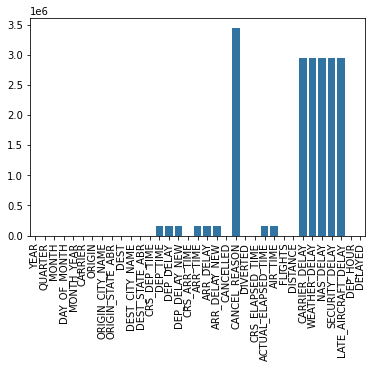

In [754]:
na_counts = subset_top10_or_df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(x=na_counts.index.values, y=na_counts, color = base_color);
plt.xticks(rotation = 90);

In [832]:
na_counts = subset_top10_or_df.isna().sum()
print( "Percent of nulls:\n ", na_counts[na_counts.values!=0]/subset_top10_or_df.shape[0])
print(subset_top10_or_df[(subset_top10_or_df.ARR_DELAY_NEW.isna()) & ((subset_top10_or_df.CANCELLED!=1) & (subset_top10_or_df.DIVERTED!=1))].CARRIER.value_counts())

Percent of nulls:
  DEP_TIME               0.042982
DEP_DELAY              0.043375
DEP_DELAY_NEW          0.043375
ARR_TIME               0.044100
ARR_DELAY              0.046248
ARR_DELAY_NEW          0.046248
CANCEL_REASON          0.956295
CRS_ELAPSED_TIME       0.000019
ACTUAL_ELAPSED_TIME    0.046051
AIR_TIME               0.046051
CARRIER_DELAY          0.821979
WEATHER_DELAY          0.821979
NAS_DELAY              0.821979
SECURITY_DELAY         0.821979
LATE_AIRCRAFT_DELAY    0.821979
dtype: float64
Endeavor Air Inc.    711
Name: CARRIER, dtype: int64


>  There are a small number of missing fields in the departure and arrival data, which was expected. The #'s are < 5%. As it turns out of those, most are either CANCELLED or DIVERTED flights.  There are only 711 that aren't and these are all from Endeavor Air. Since there is no delay data in these I will leave them. The CANCEL_REASON and the types of delay all have a large number of missing data, which is expected since they're only used when there is a cancellation or delay

### What is the structure of your dataset?

> The dataset is a combination of 3 years worth of Bureau of Transportation Data, using only the months Jan-June for each year.

### What is/are the main feature(s) of interest in your dataset?

> I"m interested in determining the reasons for delay and cancellations for the 10 busiest airports

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Departure times, cancellation reasons, departure delays in minutes by reason, departure cities

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### First thing, I'll check a histogram of some of the categorical variables

>    Cancellation Reasons with % of total

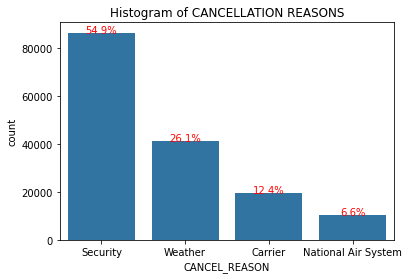

In [833]:
base_color = sb.color_palette()[0]
cat_order = subset_top10_or_df['CANCEL_REASON'].value_counts().index
sb.countplot(data = subset_top10_or_df, x = 'CANCEL_REASON', color = base_color,order=cat_order);
plt.title('Histogram of CANCELLATION REASONS');
cat_counts = subset_top10_or_df['CANCEL_REASON'].value_counts()

locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    # get text property for the label
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    #print annotation just below top of bar
    plt.text(x=loc, y=int(count),s=pct_string, ha='center', color='r')

#####  The count of Security cancellations seems really high. 

> In looking above at the breakdown of CANCELLATIONS per year, it looks like maybe we need to break this out by year. 
2020 seems to have an excessive number of Security cancellations which was skewing the overall avg 


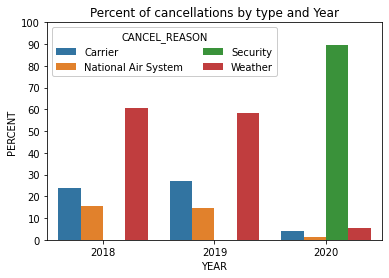

In [775]:
canc_reason = subset_top10_or_df.groupby(['YEAR','CANCEL_REASON']).CANCEL_REASON.count()*100/subset_top10_or_df.groupby(['YEAR'])['CANCELLED'].sum()
canc_reason = canc_reason.reset_index()
canc_reason.columns = ['YEAR','CANCEL_REASON', 'PERCENT']
#print(canc_reason)

ax = sb.barplot(data = canc_reason, x = 'YEAR', y = 'PERCENT', hue = 'CANCEL_REASON')
ax.legend(loc = 'best', ncol = 2, framealpha = 1, title = 'CANCEL_REASON')
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100]);
plt.title('Percent of cancellations by type and Year');

> next up,  count the flights by carrier to see who flies the most flights, this might have an effect on delays or cancellations

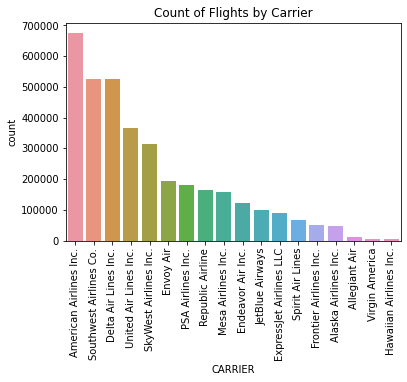

In [744]:
cat_order = subset_top10_or_df['CARRIER'].value_counts().index

sb.countplot(data = subset_top10_or_df, x = 'CARRIER',order=cat_order)
plt.xticks(rotation = 90);
plt.title('Count of Flights by Carrier');

> This is pretty much what I would have expected, with the exception of Alaska - I would have thought they would be higher in the list.  The Top 4 are American, Southwest, Delta, and United

#### Let's see what happens if we break this one out by year as well

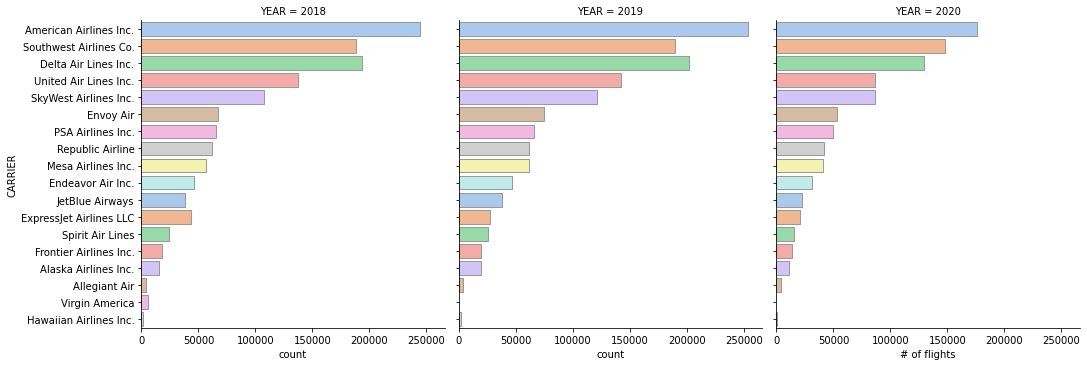

In [758]:
sorted_counts = subset_top10_or_df['CARRIER'].value_counts().index

sb.catplot(y="CARRIER", kind="count", col='YEAR',order=sorted_counts,
            palette="pastel", edgecolor=".6",
            data=subset_top10_or_df);

plt.xlabel('# of flights');

>  In this case, there isn't much difference.  The # of flights goes down substantially in 2020, but the order seems to stay roughly the same

####  Show the cancellation reasons as a pie chart

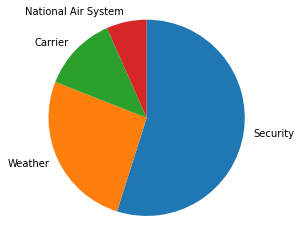

In [755]:
sorted_counts = subset_top10_or_df['CANCEL_REASON'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');


#### Once again, We need to break this out by year

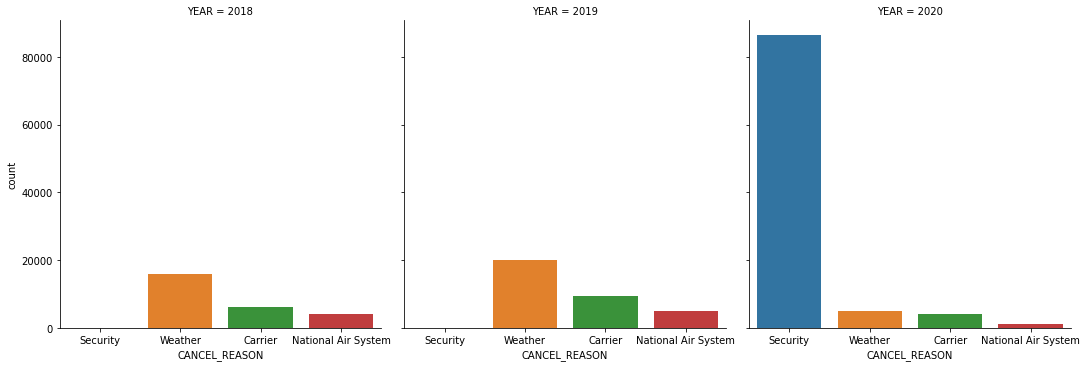

In [756]:
sb.catplot(x="CANCEL_REASON", kind="count", data=subset_top10_or_df, col='YEAR', order=subset_top10_or_df['CANCEL_REASON'].value_counts().index);


>  As we saw from the percentages above, in 2018 and 2019 Weather is the largest reason for cancelled flights.  In 2020 almost all are Security related.

#### Next I'll run histograms for the numerical values

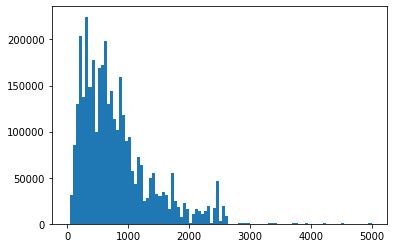

In [759]:
bin_edges = np.arange(0, subset_top10_or_df['DISTANCE'].max()+50, 50)
plt.hist(data = subset_top10_or_df, x = 'DISTANCE', bins = bin_edges);


> let's try using a log scale on this

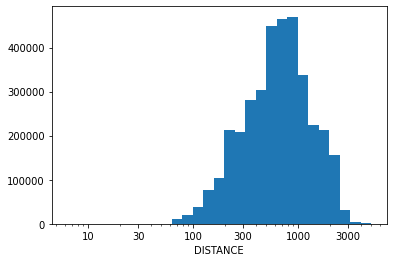

In [835]:
bin_edges = 10 ** np.arange(0.8, np.log10(subset_top10_or_df['DISTANCE'].max())+0.1, 0.1)
plt.hist(subset_top10_or_df['DISTANCE'], bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);
plt.xlabel('DISTANCE');


> now it's slightly skewed to the left.  It looks like the peak distances are in the 600-800 range

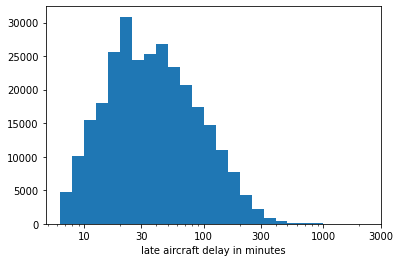

In [838]:
bin_edges = 10 ** np.arange(0.8, np.log10(subset_top10_or_df.LATE_AIRCRAFT_DELAY.max())+0.1, 0.1)
plt.hist(subset_top10_or_df.LATE_AIRCRAFT_DELAY, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);
plt.xlabel('late aircraft delay in minutes');

> bimodal with peaks at 20 and 50

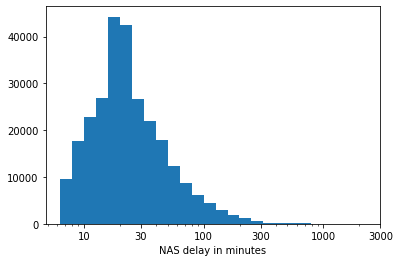

In [837]:
bin_edges = 10 ** np.arange(0.8, np.log10(subset_top10_or_df.NAS_DELAY.max())+0.1, 0.1)
plt.hist(subset_top10_or_df.NAS_DELAY, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);
plt.xlabel('NAS delay in minutes');

> this is slightly skewed to the right with a peak around 20

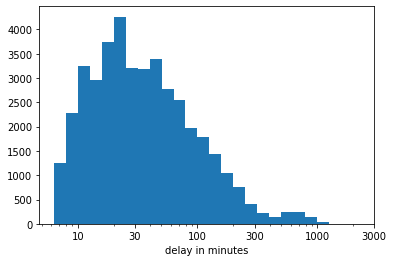

In [836]:
bin_edges = 10 ** np.arange(0.8, np.log10(subset_top10_or_df.WEATHER_DELAY.max())+0.1, 0.1)
plt.hist(subset_top10_or_df.WEATHER_DELAY, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);
plt.xlabel('weather delay in minutes');

>  THe weather delay is trimodal with a peak around 10, 20 and 50 

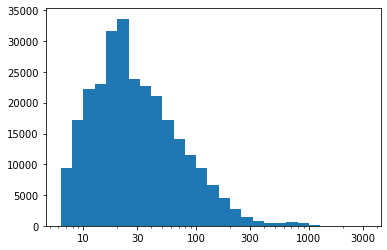

In [762]:
bin_edges = 10 ** np.arange(0.8, np.log10(subset_top10_or_df.CARRIER_DELAY.max())+0.1, 0.1)
plt.hist(subset_top10_or_df.CARRIER_DELAY, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);


> the carrier delay peaks around 20 minutes

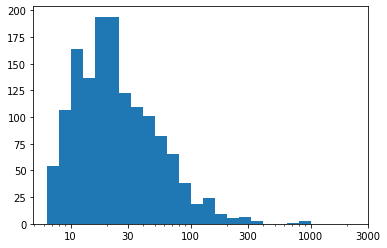

In [763]:
bin_edges = 10 ** np.arange(0.8, np.log10(subset_top10_or_df.SECURITY_DELAY.max())+0.1, 0.1)
plt.hist(subset_top10_or_df.SECURITY_DELAY, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);

> security delay peaks around 20

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of the were all different shapes but most seemed to have a peak at 20 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I created a subset of the data with the 10 busiest airports.  There is just too much data and noise otherwise.
I also created a DELAYED flag and set it.  The flight delay minutes lend themselves to a categorical type, but because some flights can have 2 types, it doesn't work. Setting the flag makes it easier to group.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#####  There doesn't appear to be a lot of correlation between variables. AIR_TIME and DISTANCE are highly correlated which makes sense. 

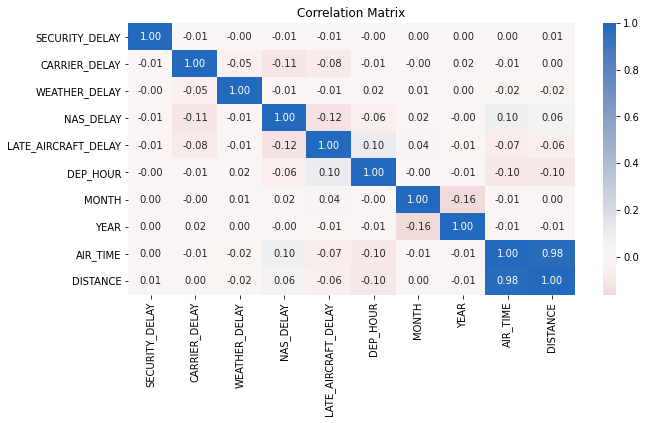

In [733]:
plt.figure(figsize = [10, 5])

corr_subset = subset_top10_or_df[['SECURITY_DELAY','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','LATE_AIRCRAFT_DELAY','DEP_HOUR', 'MONTH','YEAR','AIR_TIME','DISTANCE']]
sb.heatmap(corr_subset.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.title('Correlation Matrix');

>  See if there's any correlation between Cancelled flights and distance

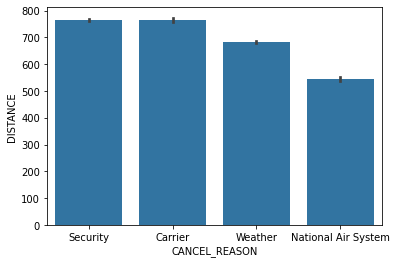

In [765]:
group_means = subset_top10_or_df[subset_top10_or_df.CANCELLED==1].groupby(['CANCEL_REASON']).mean()
group_order = group_means.sort_values(['DISTANCE'], ascending = False).index

sb.barplot(data = subset_top10_or_df, x = 'CANCEL_REASON', y = 'DISTANCE', color = base_color, order=group_order);


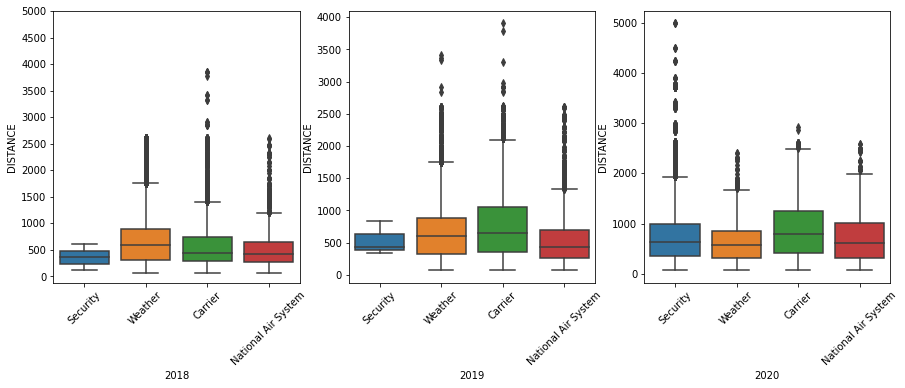

In [766]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
sorted_counts = subset_top10_or_df['CANCEL_REASON'].value_counts().index

plt.subplot(1,3,1)
ax = sb.boxplot(x="CANCEL_REASON", y="DISTANCE", data=subset_top10_or_df[subset_top10_or_df.YEAR==2018], order=sorted_counts);
ax.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]);
plt.xticks(rotation = 45) 
plt.xlabel('2018')

plt.subplot(1, 3,2)
ax = sb.boxplot(x="CANCEL_REASON", y="DISTANCE", data=subset_top10_or_df[subset_top10_or_df.YEAR==2019], order=sorted_counts);
plt.xticks(rotation = 45) 
plt.xlabel('2019')

plt.subplot(1, 3, 3)
ax = sb.boxplot(x="CANCEL_REASON", y="DISTANCE", data=subset_top10_or_df[subset_top10_or_df.YEAR==2020], order=sorted_counts);
plt.xticks(rotation = 45) 
plt.xlabel('2020');


>  When broken out by year, the outliers seem to be much longer distances.  

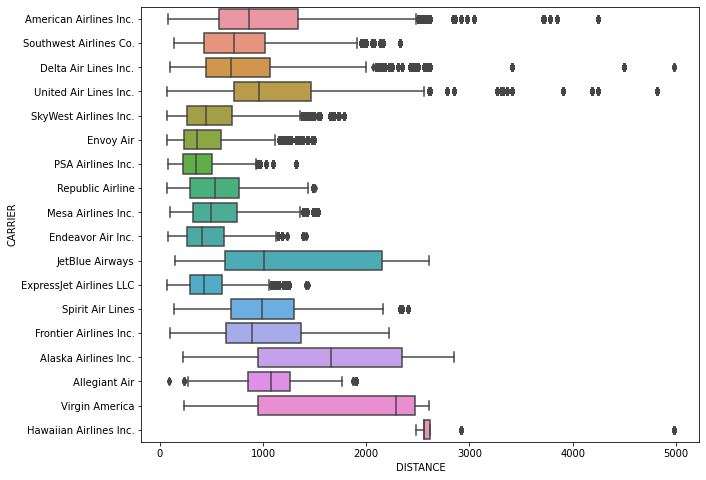

In [773]:
plt.figure(figsize = (10,8))
sorted_counts = subset_top10_or_df['CARRIER'].value_counts().index

ax = sb.boxplot(y="CARRIER", x="DISTANCE", data=subset_top10_or_df, order=sorted_counts);

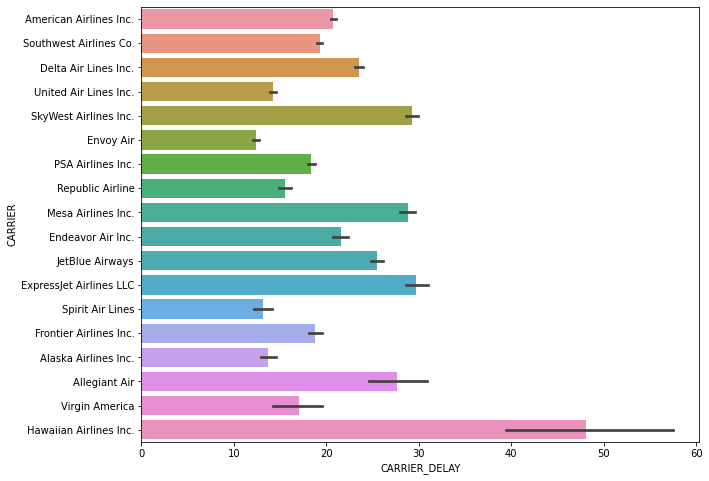

In [865]:
plt.figure(figsize = (10,8))
sorted_counts = subset_top10_or_df['CARRIER'].value_counts().index

ax = sb.barplot(y="CARRIER", x="CARRIER_DELAY", data=subset_top10_or_df, order=sorted_counts);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Virgin, Alaska and Hawaaian airlines fly the longest distances.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The airline that flies the longest distances (Hawaiian) also has the longest carrier delays.  

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<Figure size 720x576 with 0 Axes>

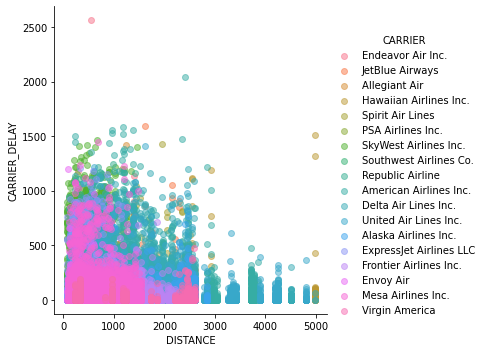

In [850]:
plt.figure(figsize=(10,8))
g = sb.FacetGrid(data = subset_top10_or_df, hue = 'CARRIER', height = 5)
g.map(plt.scatter, 'DISTANCE','CARRIER_DELAY', alpha=0.5)
g.add_legend();


>  I'm not really seeing much of a correlation between distance and carrier delays.  There's too much data

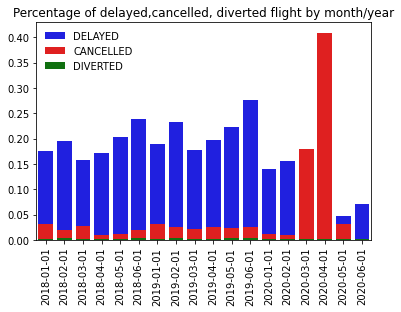

In [789]:

div = subset_top10_or_df.groupby(['MONTH_YEAR'])['DIVERTED'].sum()/subset_top10_or_df.groupby(['MONTH_YEAR'])['FLIGHTS'].sum()
canc = subset_top10_or_df.groupby(['MONTH_YEAR'])['CANCELLED'].sum()/subset_top10_or_df.groupby(['MONTH_YEAR'])['FLIGHTS'].sum()
delay = subset_top10_or_df.groupby(['MONTH_YEAR'])['DELAYED'].sum()/subset_top10_or_df.groupby(['MONTH_YEAR'])['FLIGHTS'].sum()
base_color = sb.color_palette()[0]
sb.barplot(x=delay.index.values, y=delay, color = 'b', label='DELAYED')
sb.barplot(x=canc.index.values, y=canc, color = 'r', label='CANCELLED')
sb.barplot(x=div.index.values, y=div, color = 'g', label='DIVERTED')
plt.xticks(rotation=90);
plt.title('Percentage of delayed,cancelled, diverted flight by month/year');

plt.legend(frameon = False);



> This shows that there is somewhat of a pattern with flight Delays with an increase in Feb, then March drops, then there's a gradual increase each month of April, May and June.  With Covid however, this pattern changed completely in 2020.  There were almost no delays, only cancellations for  March, April and part of May.

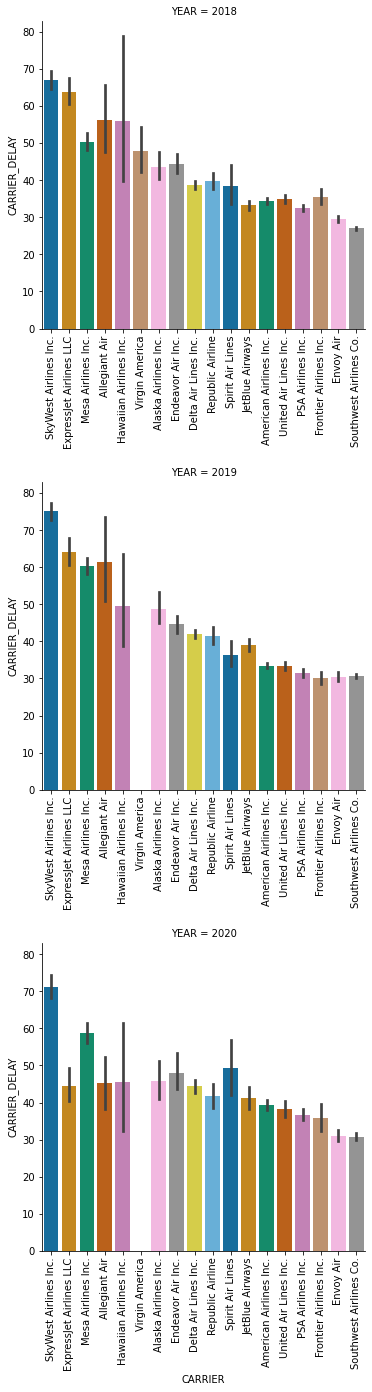

In [847]:
carrier_delay = subset_top10_or_df[(subset_top10_or_df.CARRIER_DELAY != 0.0) & (subset_top10_or_df.CARRIER_DELAY.notna())]
order_cnt = carrier_delay.groupby(['CARRIER'])['CARRIER_DELAY'].mean().sort_values(ascending=False).index

g = sb.FacetGrid(carrier_delay, col="YEAR",col_wrap=1, height=6,sharex=False)
g.map(sb.barplot, "CARRIER", "CARRIER_DELAY", order=order_cnt, palette="colorblind");
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=90)

plt.subplots_adjust(hspace=.5)

plt.show()

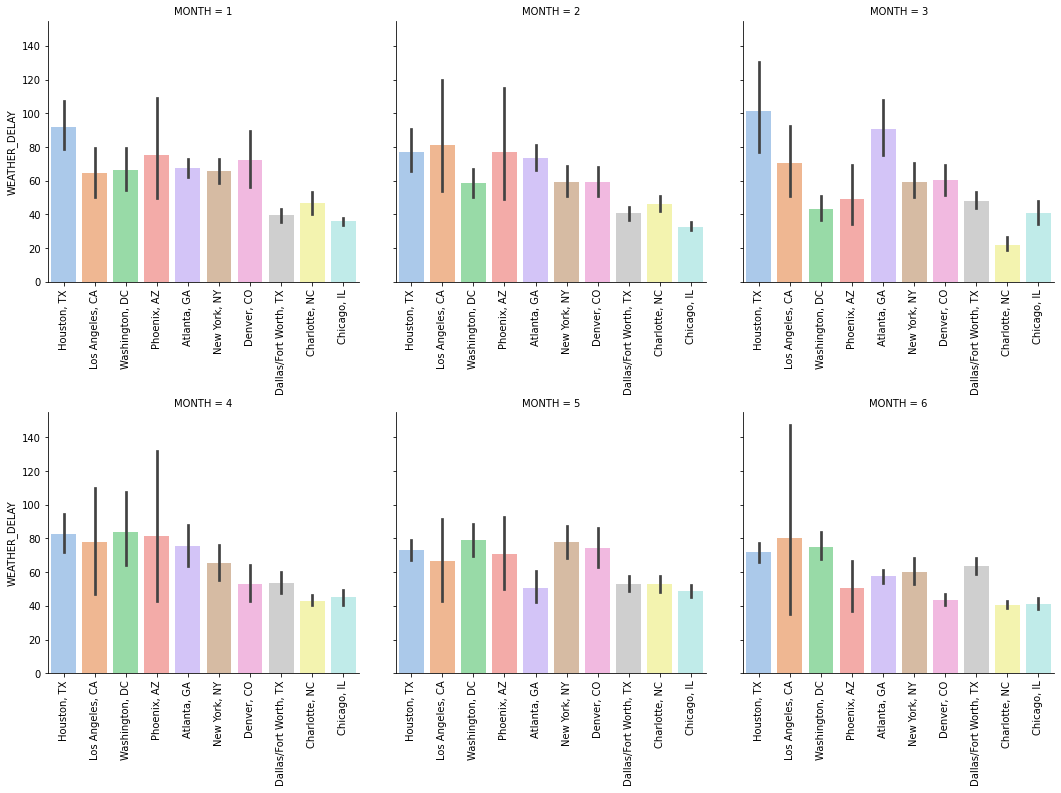

In [753]:
weather_delay = subset_top10_or_df[(subset_top10_or_df.WEATHER_DELAY != 0.0) & (subset_top10_or_df.WEATHER_DELAY.notna())]
order_cnt = weather_delay.groupby(['ORIGIN_CITY_NAME'])['WEATHER_DELAY'].mean().sort_values(ascending=False).index

g = sb.FacetGrid(weather_delay, col="MONTH",sharex=False, col_wrap=3, height=5)
g.map(sb.barplot, "ORIGIN_CITY_NAME", "WEATHER_DELAY", order=order_cnt, palette="pastel");

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('')

plt.subplots_adjust(hspace=.5)
plt.show()

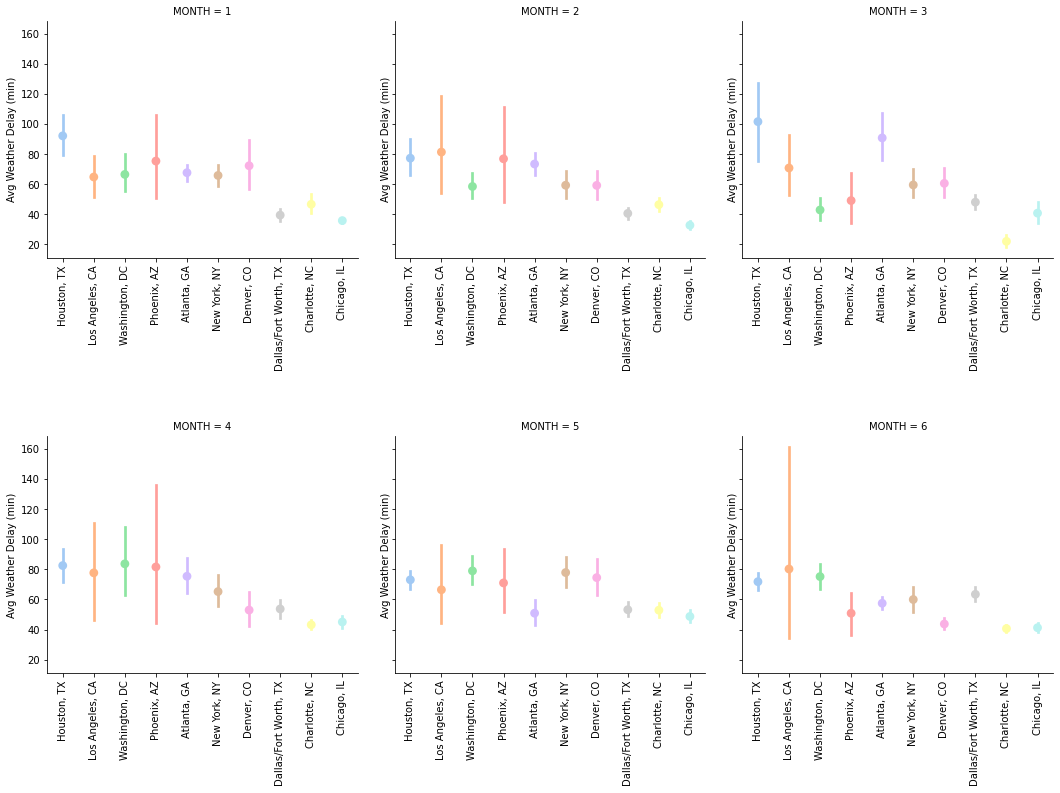

In [723]:
order_cnt = weather_delay.groupby(['ORIGIN_CITY_NAME'])['WEATHER_DELAY'].mean().sort_values(ascending=False).index

g = sb.FacetGrid(data = weather_delay, col = 'MONTH', margin_titles = True, col_wrap=3, height=5, sharex=False)

g.map(sb.pointplot, "ORIGIN_CITY_NAME", "WEATHER_DELAY",order=order_cnt, palette='pastel')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('Avg Weather Delay (min)');
plt.subplots_adjust(hspace=.75)

plt.xticks(rotation=90);

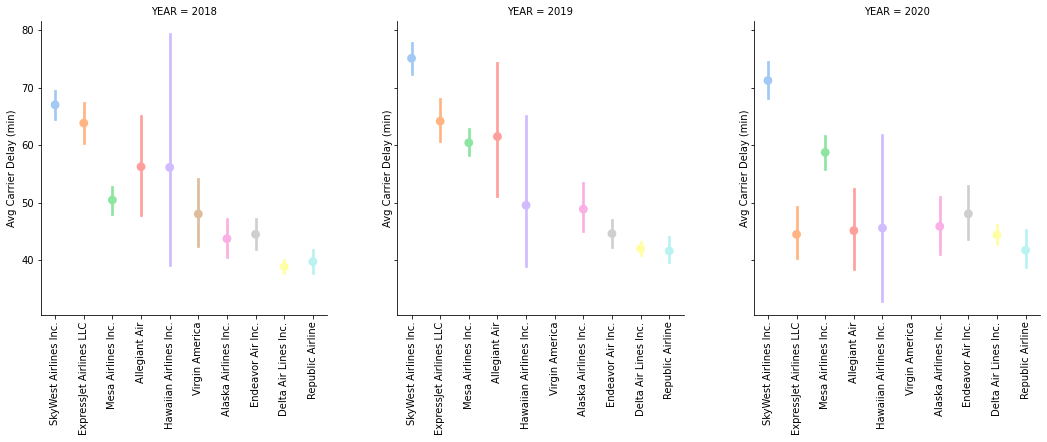

In [720]:
#plt.figure(figsize=(10,8))
carrier_delay = subset_top10_or_df[(subset_top10_or_df.CARRIER_DELAY != 0.0) & (subset_top10_or_df.CARRIER_DELAY.notna())]
order_cnt = carrier_delay.groupby(['CARRIER'])['CARRIER_DELAY'].mean().sort_values(ascending=False).head(10).index

g = sb.FacetGrid(data = carrier_delay, col = 'YEAR', margin_titles = True, col_wrap=3, height=5, sharex=False)

#carrier_delay.groupby(['CARRIER'])['CARRIER_DELAY'].mean().sort_values(ascending=False).head(10)
g.map(sb.pointplot, "CARRIER", "CARRIER_DELAY",order=order_cnt, palette='pastel')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('Avg Carrier Delay (min)');
plt.subplots_adjust(hspace=.75)

plt.xticks(rotation=90);


#####   According to the Bureau of Tranportation,  these are the 5 type of flight delays:

- Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.
- Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

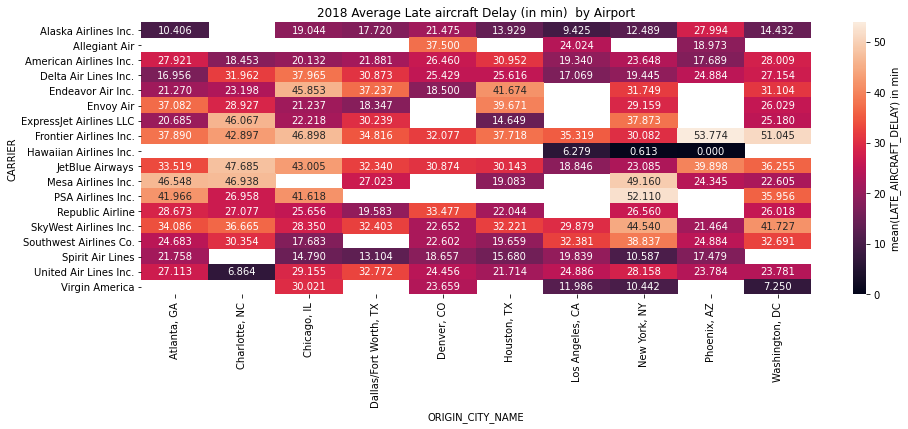

In [867]:
plt.figure(figsize = [15, 5])

cat_means = subset_top10_or_df[subset_top10_or_df.YEAR==2018].groupby(['CARRIER', 'ORIGIN_CITY_NAME']).mean()['LATE_AIRCRAFT_DELAY']
cat_means = cat_means.reset_index(name = 'LATE_AIRCRAFT_DELAY_avg')
cat_means = cat_means.pivot(index = 'CARRIER', columns = 'ORIGIN_CITY_NAME',
                            values = 'LATE_AIRCRAFT_DELAY_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(LATE_AIRCRAFT_DELAY) in min'});

plt.title('2018 Average Late aircraft Delay (in min)  by Airport');

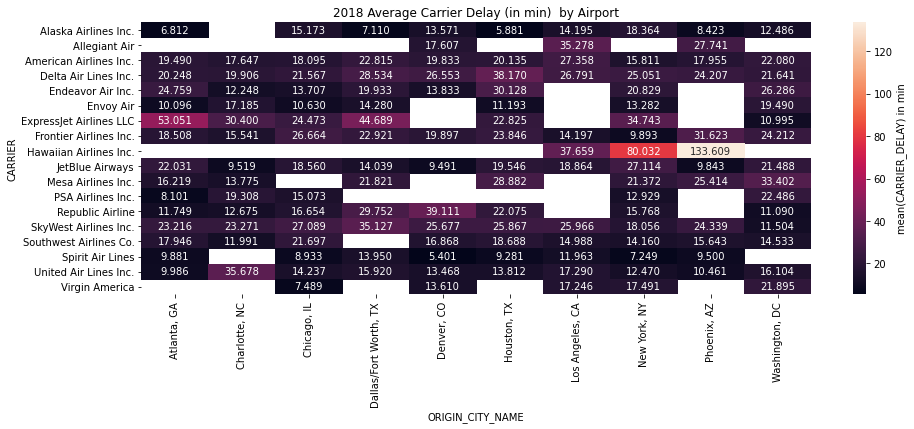

In [846]:
plt.figure(figsize = [15, 5])

cat_means = subset_top10_or_df[subset_top10_or_df.YEAR==2018].groupby(['CARRIER', 'ORIGIN_CITY_NAME']).mean()['CARRIER_DELAY']
cat_means = cat_means.reset_index(name = 'CARRIER_DELAY_avg')
cat_means = cat_means.pivot(index = 'CARRIER', columns = 'ORIGIN_CITY_NAME',
                            values = 'CARRIER_DELAY_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(CARRIER_DELAY) in min'});

plt.title('2018 Average Carrier Delay (in min)  by Airport');

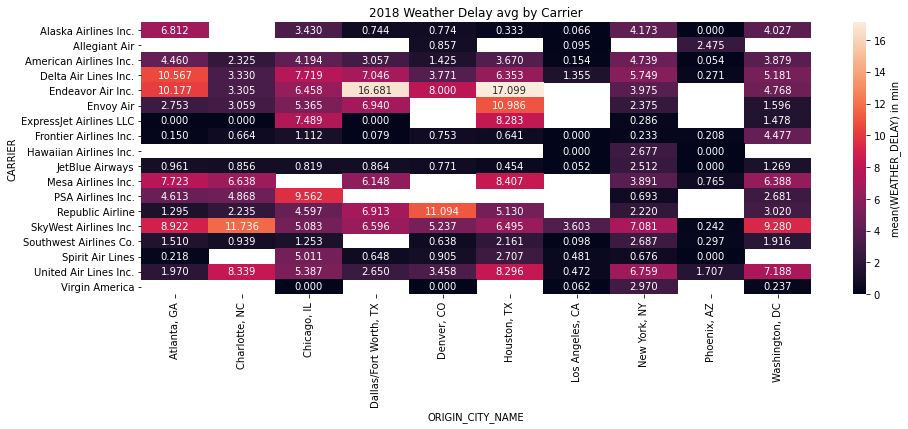

In [725]:
plt.figure(figsize = [15, 5])
cat_means = subset_top10_or_df[subset_top10_or_df.YEAR==2018].groupby(['CARRIER', 'ORIGIN_CITY_NAME']).mean()['WEATHER_DELAY']
cat_means = cat_means.reset_index(name = 'WEATHER_DELAY_avg')
cat_means = cat_means.pivot(index = 'CARRIER', columns = 'ORIGIN_CITY_NAME',
                            values = 'WEATHER_DELAY_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(WEATHER_DELAY) in min'});
plt.title('2018 avg Weather Delay in min by Carrier');

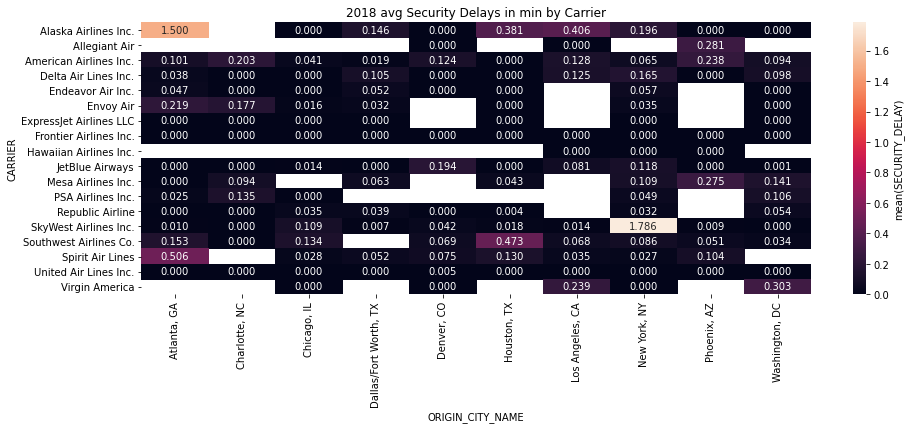

In [726]:
plt.figure(figsize = [15, 5])
cat_means = subset_top10_or_df[subset_top10_or_df.YEAR==2018].groupby(['CARRIER', 'ORIGIN_CITY_NAME']).mean()['SECURITY_DELAY']
cat_means = cat_means.reset_index(name = 'SECURITY_DELAY_avg')
cat_means = cat_means.pivot(index = 'CARRIER', columns = 'ORIGIN_CITY_NAME',
                            values = 'SECURITY_DELAY_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(SECURITY_DELAY)'});

plt.title('2018 avg Security Delays in min by Carrier');

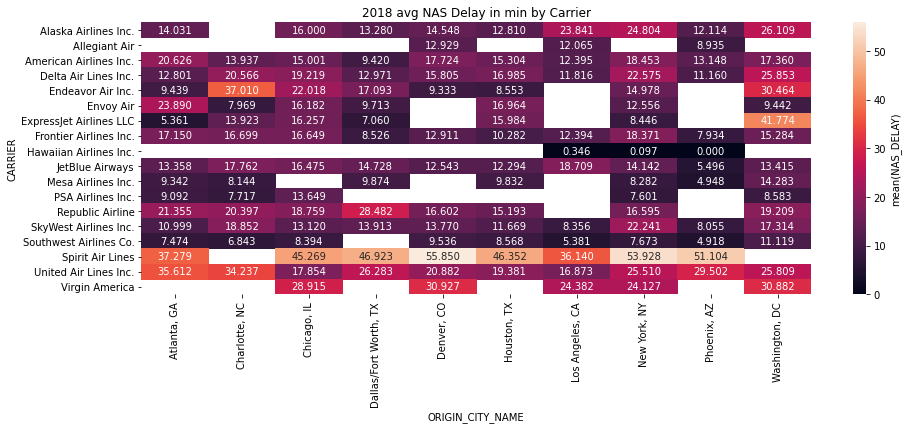

In [728]:
plt.figure(figsize = [15, 5])
cat_means = subset_top10_or_df[subset_top10_or_df.YEAR==2018].groupby(['CARRIER', 'ORIGIN_CITY_NAME']).mean()['NAS_DELAY']
cat_means = cat_means.reset_index(name = 'NAS_DELAY_avg')
cat_means = cat_means.pivot(index = 'CARRIER', columns = 'ORIGIN_CITY_NAME',
                            values = 'NAS_DELAY_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(NAS_DELAY)'});

plt.title('2018 avg NAS Delay in min by Carrier');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Houston, LA and PHoenix seem to be the worst cities for weather delays. SKywest, ExpressJet, Mesa, Allegiant and Hawaain air have the highest Carrier Delays. In looking at city, carrier and NAS delay it appears that Spirit and United airlines have a lot of delays, as seen in the heatmap. The short hop airlines also have a lot more late aircraft delays.

### Were there any interesting or surprising interactions between features?

> The 4 airlines with the highest carrier delays, also fly some of the shortest distances.  This actually makes sense since there are more touchdowns and landings to worry about.
I also found it interesting that there was a pattern to the delays by month.   Hawaiian airlines has some serious delays going into New York and Phoenix.